In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

In [2]:
#Leitura do dataset

#data_file="Arnas/arnas_pre-processed-ts_01-03-2017_31-08-2017"
data_file="arnas_pre-processed-ts_01-03-2017_01-04-2017"
#data_file="Emil/emil"

df=pd.read_csv(filepath_or_buffer=data_file+".csv")
df=df.dropna(axis=0)
X = df.iloc[:,1:].values

In [3]:
'''seed = 0
numpy.random.seed(seed)
"""X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes"""
numpy.random.shuffle(X_train)
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:10000])  # Keep only 50 time series
#X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)  # Make time series shorter
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Euclidean $k$-means")

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3, n_init=2, metric="dtw", verbose=True, max_iter_barycenter=10, random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("DBA $k$-means")

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3, metric="softdtw", metric_params={"gamma_sdtw": .01},
                           verbose=True, random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()''';

In [4]:
seed = 0
np.random.seed(seed)
np.random.shuffle(X)
#X = TimeSeriesScalerMeanVariance().fit_transform(X)

time_init=dt.datetime.now()
Ks = range(2,25)
ts_km = [TimeSeriesKMeans(n_clusters=k,metric="softdtw",metric_params={"gamma_sdtw": .01}, verbose=True, random_state=seed, tol=1e-4) for k in Ks]
scores = [ts_km[i].fit(X).inertia_ for i in range(len(ts_km))]
time_end=dt.datetime.now()-time_init
print("Duração:"+str(time_end))

697170.490 --> 205602.908 --> 201554.473 --> 201336.710 --> 202299.005 --> 203518.107 --> 204150.916 --> 204230.720 --> 204186.410 --> 204122.650 --> 204132.727 --> 204129.221 --> 204129.348 --> 204129.163 --> 204129.179 --> 204129.171 --> 204129.171 --> 
281813.611 --> 120157.024 --> 102068.918 --> 98728.292 --> 98266.778 --> 98305.362 --> 98276.144 --> 98311.364 --> 98402.597 --> 98484.213 --> 98561.502 --> 98595.023 --> 98594.289 --> 98594.452 --> 98594.427 --> 98594.433 --> 98594.432 --> 98594.432 --> 98594.432 --> 
143637.377 --> 73799.282 --> 71326.433 --> 70573.132 --> 70292.938 --> 70097.815 --> 70033.841 --> 70060.552 --> 70049.914 --> 70047.270 --> 70046.988 --> 70047.062 --> 70047.062 --> 
122948.218 --> 68625.723 --> 66425.206 --> 66087.507 --> 65588.504 --> 65421.992 --> 65389.111 --> 65404.346 --> 65424.568 --> 65423.313 --> 65423.352 --> 65423.323 --> 65423.324 --> 65423.324 --> 65423.324 --> 
107835.060 --> 58711.960 --> 48854.424 --> 46684.506 --> 45757.640 --> 45432.3

In [5]:
m=(scores[0]-scores[-1])/(Ks[0]-Ks[-1])
y=[scores[0] + m * (x - Ks[0]) for x in Ks]

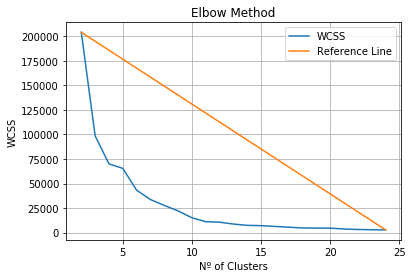

In [6]:
plt.plot(Ks, scores, label='WCSS')
plt.plot(Ks, y, label='Reference Line')
plt.title('Elbow Method')
plt.xlabel('Nº of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid()

In [7]:
from numpy import arccos, array, dot, pi, cross
from numpy.linalg import det, norm

# from: https://gist.github.com/nim65s/5e9902cd67f094ce65b0
def distance_numpy(A, B, P):
    """ segment line AB, point P, where each one is an array([x, y]) """
    if all(A == P) or all(B == P):
        return 0
    if arccos(dot((P - A) / norm(P - A), (B - A) / norm(B - A))) > pi / 2:
        return norm(P - A)
    if arccos(dot((P - B) / norm(P - B), (A - B) / norm(A - B))) > pi / 2:
        return norm(P - B)
    return norm(cross(A-B, A-P))/norm(B-A)

In [8]:
distances = []
A=np.array([Ks[0], y[0]])
B=np.array([Ks[-1], y[-1]])

for k in Ks:
    ind = Ks.index(k)
    P=np.array([k, scores[ind]])
    distances.append(distance_numpy(A,B,P))
    
k_opt = distances.index(max(distances))+2

In [9]:
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=k_opt, metric="softdtw", metric_params={"gamma_sdtw": .01},
                           verbose=True, random_state=seed)
KMeansLabels = sdtw_km.fit_predict(X)

Soft-DTW k-means
88541.765 --> 35462.646 --> 33460.358 --> 33442.235 --> 33591.801 --> 33666.639 --> 33696.429 --> 33700.880 --> 33701.051 --> 33697.871 --> 33697.428 --> 33697.432 --> 33697.432 --> 33697.432 --> 


IndexError: list index out of range

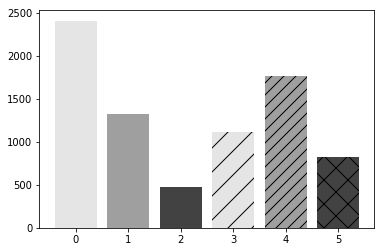

In [10]:
clusters = list(np.unique(KMeansLabels))
greys = 2*['#e5e5e5', '#9f9f9f', '#424242']
patterns = ['/', '//', 'x']

for cluster in clusters:
    nth_class = [label for label in KMeansLabels if label == cluster]
    bar_height=len(nth_class)
    ind=clusters.index(cluster)
    pattern = None if ind < 3 else patterns[ind-3]
    plt.bar(nth_class, height=bar_height, label="Cluster "+str(cluster), color=greys[ind], hatch=pattern)

plt.title("Distribuição dos Clusters por Classe\n",fontsize=20)
plt.xlabel("Classe")
plt.ylabel("Quantidade de Cluster")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, fontsize=12)
plt.show()

In [ ]:
[(sdtw_km.cluster_centers_[i]) for i in range(len((sdtw_km.cluster_centers_)))]

In [ ]:
centroids=[[sdtw_km.cluster_centers_[i][j][0] for j in range(len(sdtw_km.cluster_centers_[i]))] for i in range(len(sdtw_km.cluster_centers_))]
centroids_df=pd.DataFrame(list(map(list, zip(*centroids))),columns=['Cluster '+str(i) for i in range(len(sdtw_km.cluster_centers_))])
centroids_df.index=df.iloc[:,1:].columns

In [ ]:
print(centroids_df)

In [ ]:
centroids_df.to_csv('Centroids - Arnas_01-03-2017_31-08-2017.csv')